In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import numpy as np
from sklearn.decomposition import PCA, FastICA
from sklearn.preprocessing import StandardScaler
from will import detect

In [3]:
# Load and prepare your data
data_dir_scattered = "simulated_scattered_bursts"
data_dir_simple = "simulated_simple_bursts"

# Load the data from both directories into separate arrays
data_scattered = []
data_simple = []

for filename in os.listdir(data_dir_scattered):
    if filename.endswith(".npy"):
        data_scattered.append(np.load(os.path.join(data_dir_scattered, filename)))

for filename in os.listdir(data_dir_simple):
    if filename.endswith(".npy"):
        data_simple.append(np.load(os.path.join(data_dir_simple, filename)))

data_scattered = np.array(data_scattered).reshape(-1, 1024 * 512)[0:100]
data_simple = np.array(data_simple).reshape(-1, 1024 * 512)[0:100]

# Combine the two datasets into one
combined_data = np.concatenate((data_scattered, data_simple), axis=0)

# Reshape the combined data for PCA
combined_data_2d = combined_data.reshape(-1, 1024 * 512)

combined_data_2d.shape

(200, 524288)

In [4]:
# Apply FastICA to the combined data
n_components = 2  # Number of components to visualize
fast_ica = FastICA(n_components=n_components, random_state=0)
fit = fast_ica.fit_transform(combined_data_2d)

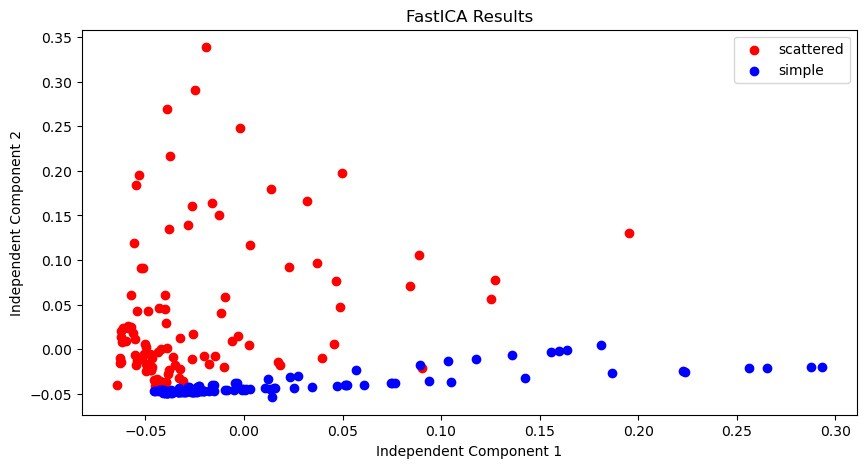

In [5]:
# Plot the FastICA results directly
plt.figure(figsize=(10, 5))
plt.scatter(fit[:100, 0], fit[:100, 1], c='r', label='scattered')
plt.scatter(fit[100:, 0], fit[100:, 1], c='b', label='simple')
plt.xlabel('Independent Component 1')
plt.ylabel('Independent Component 2')
plt.title('FastICA Results')
plt.legend()
plt.show()

In [6]:
# Apply FastICA to the combined data
n_components = 3  # Number of components to visualize
fast_ica = FastICA(n_components=n_components, random_state=0)
fit = fast_ica.fit_transform(combined_data_2d)

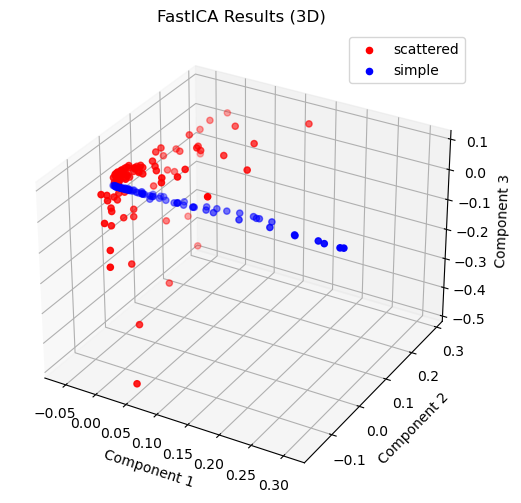

In [8]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for FastICA results colored by "scattered" and "simple"
ax.scatter(fit[:100, 0], fit[:100, 1], fit[:100, 2], c='r', label='scattered')
ax.scatter(fit[100:, 0], fit[100:, 1], fit[100:, 2], c='b', label='simple')

# Set axis labels
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

# Set a title for the plot
ax.set_title('FastICA Results (3D)')

# Display a legend to differentiate the two datasets
plt.legend()

# Show the plot
plt.show()
